<xarray.Dataset> Size: 2GB
Dimensions:  (time: 366, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 3kB 2024-01-01 2024-01-02 ... 2024-12-31
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 2GB ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    institution:    NOAA/National Centers for Environmental Information
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...


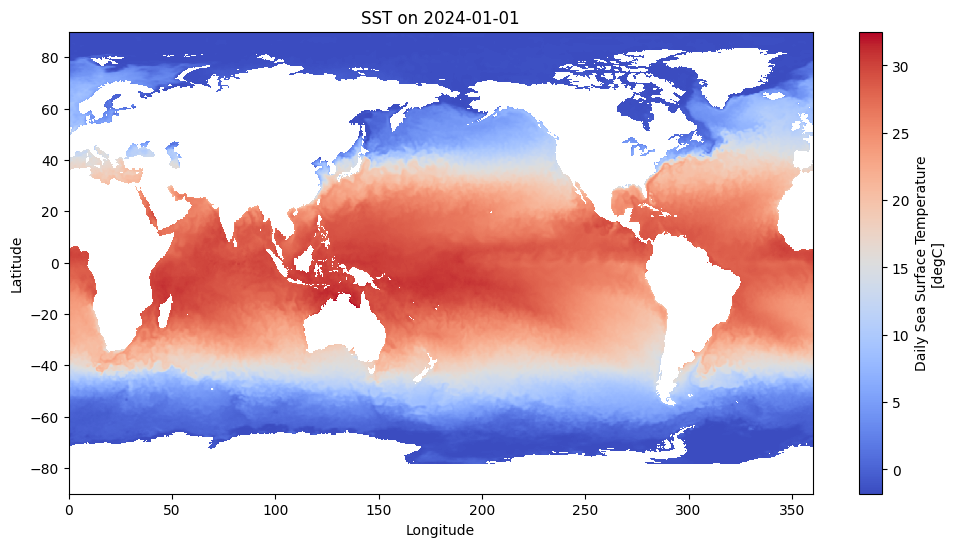

In [13]:
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path

# Get project root and data folder
project_root = Path.cwd().parents[0]  # assuming you're inside notebooks/
data_path = project_root / "data" / "sst_2024.nc"

# Load the dataset
ds = xr.open_dataset(data_path, engine="netcdf4")

# Explore the dataset
print(ds)

# Plot the SST
sst_day = ds['sst'].isel(time=1)  # pick first day (2024-01-01)

plt.figure(figsize=(12, 6))
vmin = float(sst_day.min())
vmax = float(sst_day.max())
sst_day.plot(cmap='coolwarm', vmin=vmin, vmax=vmax)
plt.title("SST on 2024-01-01")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig(project_root / "results" / "figures" / "sst_2024.png", dpi=300, bbox_inches="tight")
plt.show()